In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("b_depressed.csv")
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [3]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.drop(['Survey_id','Ville_id'], axis = 1, inplace = True)

In [5]:
df.isnull().sum()

sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [6]:
print('\nEl numero de filas y columnas en el data set: ',df.shape)
print('')


El numero de filas y columnas en el data set:  (1409, 21)



In [7]:
# Genero datos de entrenamiento y test
X = df.drop('depressed',axis=1) # Variable independiente
y = df['depressed'] # Variable dependiente

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [8]:
print("Numero de datos de entrenamiento: ", len(X_train))
print("Numero de datos en test: ", len(X_test))

Numero de datos de entrenamiento:  1127
Numero de datos en test:  282


## Decision Tree

In [9]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
#decision_tree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 6, min_samples_leaf = 3, max_depth= 3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
# Realizamos la prediccion
y_pred = decision_tree.predict(X_test)

In [11]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

acc_dt = metrics.accuracy_score(y_test,y_pred)
acc_dt

0.851063829787234

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[239   2]
 [ 40   1]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       241
           1       0.33      0.02      0.05        41

    accuracy                           0.85       282
   macro avg       0.59      0.51      0.48       282
weighted avg       0.78      0.85      0.79       282



[Text(0.375, 0.875, 'X[19] <= 150911.5\ngini = 0.285\nsamples = 1127\nvalue = [933, 194]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.625, 'X[4] <= 7.5\ngini = 0.282\nsamples = 1124\nvalue = [933, 191]'),
 Text(0.25, 0.375, 'X[7] <= 80877620.0\ngini = 0.374\nsamples = 253\nvalue = [190, 63]'),
 Text(0.125, 0.125, 'gini = 0.357\nsamples = 245\nvalue = [188, 57]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.75, 0.375, 'X[10] <= 87684148.0\ngini = 0.251\nsamples = 871\nvalue = [743, 128]'),
 Text(0.625, 0.125, 'gini = 0.24\nsamples = 847\nvalue = [729, 118]'),
 Text(0.875, 0.125, 'gini = 0.486\nsamples = 24\nvalue = [14, 10]')]

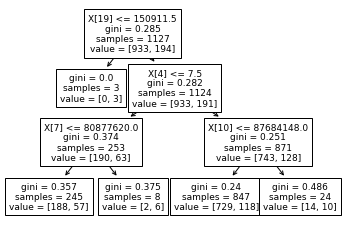

In [14]:
tree.plot_tree(decision_tree, fontsize=9) 